In [1]:
from datetime import date, timedelta, datetime
from dev import *

In [2]:
start_date=date.today()-timedelta(days=365*5)
end_date=date.today()-timedelta(days=1)

In [3]:
time_diff=end_date-start_date
time_diff

datetime.timedelta(days=1824)

In [5]:
dates_list=[]
for i in range(1,1825):
    if i%32==0:
        dates_list.append(i)

In [6]:
dates=[]
for day in dates_list:
    dt_date=start_date+timedelta(day)
    dates.append(dt_date)

In [7]:
date_pairs=[]
for i in range(len(dates)-1):
    #times_to_run=len(dates)-1
    date_pairs.append([dates[i],dates[i+1]])

In [8]:
date_pairs[0]

[datetime.date(2018, 4, 27), datetime.date(2018, 5, 29)]

In [9]:
df=get_bars_alpaca()

In [10]:
X,y=make_features_targets(df)

In [11]:
X_train_list=[]
X_test_list=[]
y_train_list=[]
y_test_list=[]
for pair in date_pairs:
    X_train_list.append(X.loc[str(pair[0]):str(pair[1])])
    X_test_list.append(X.loc[str(pair[1]):])
    y_train_list.append(y.loc[str(pair[0]):str(pair[1])])
    y_test_list.append(y.loc[str(pair[1]):])

In [18]:
predicted_df_list=[]
for i in range(len(X_train_list)):
    predicted_df_list.append(SVM_regressor(X_train_list[i],X_test_list[i],y_train_list[i],y_test_list[i]))

C:\Users\pplim\anaconda3\envs\dev\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


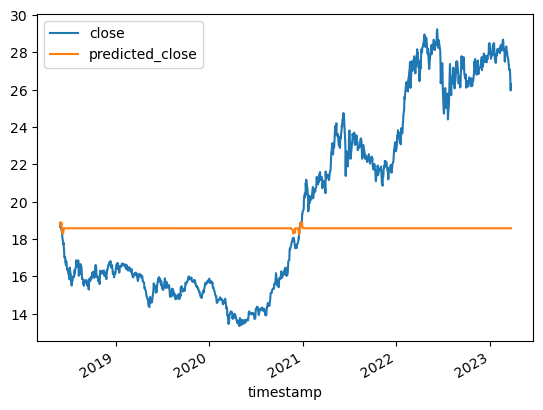

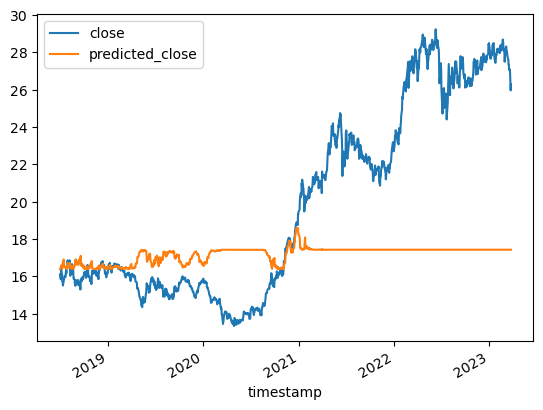

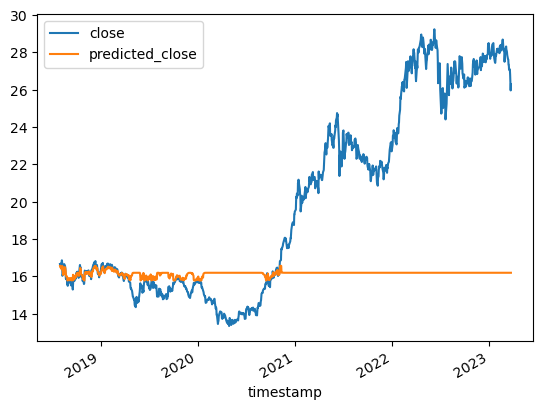

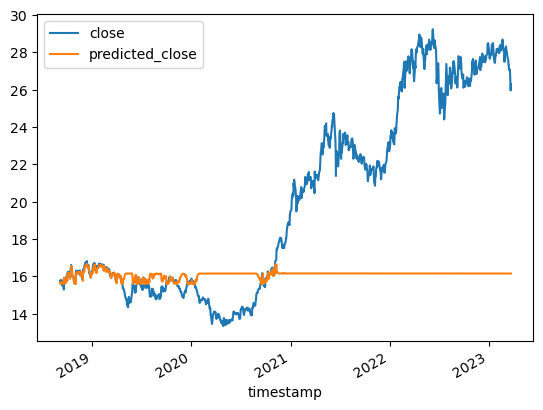

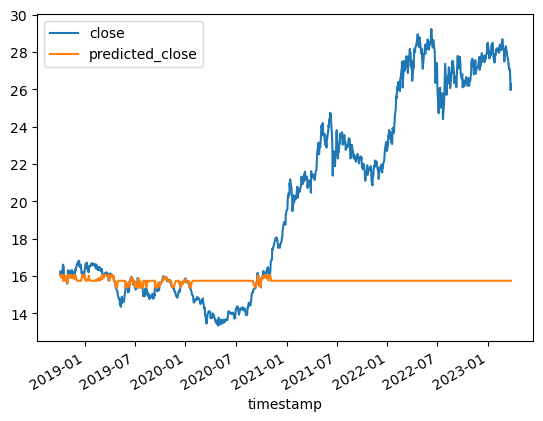

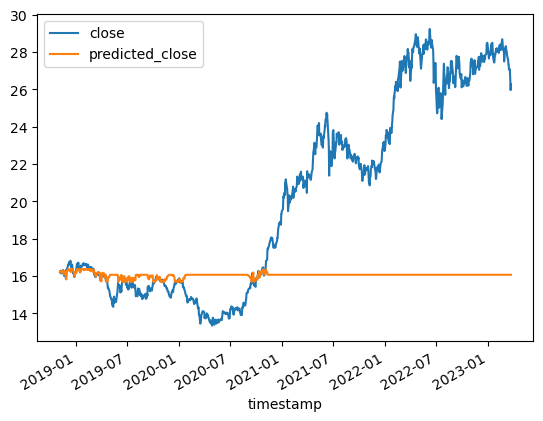

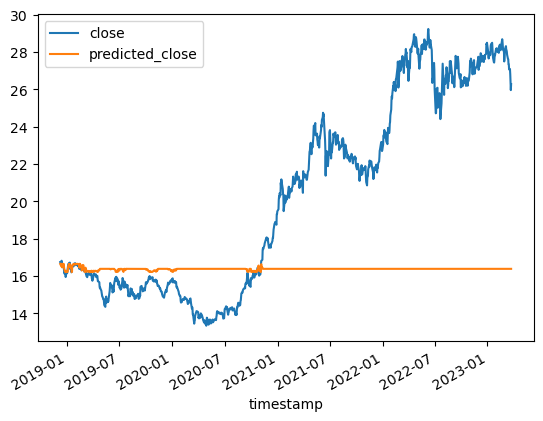

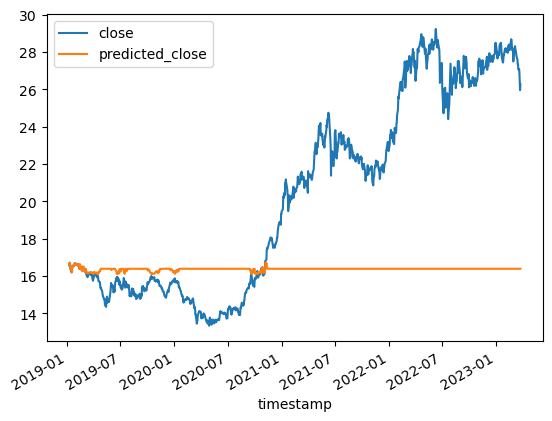

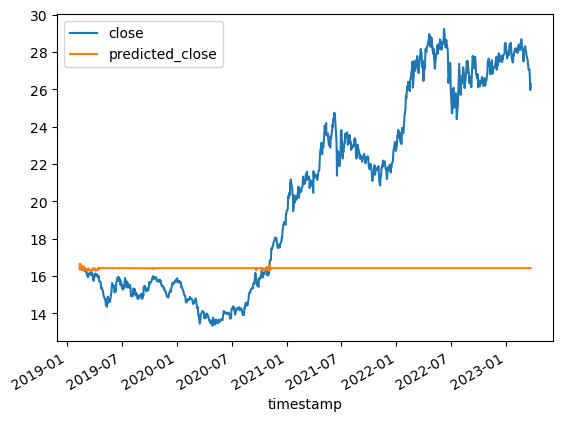

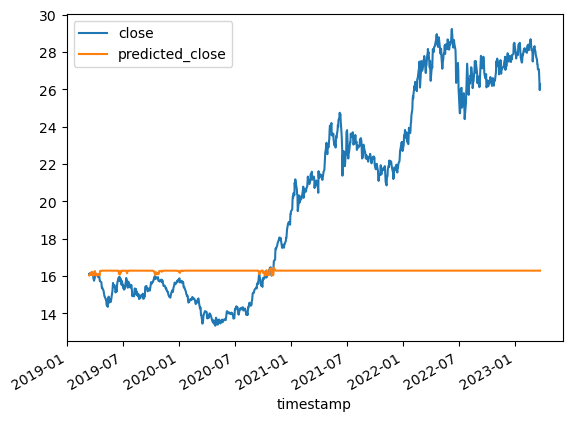

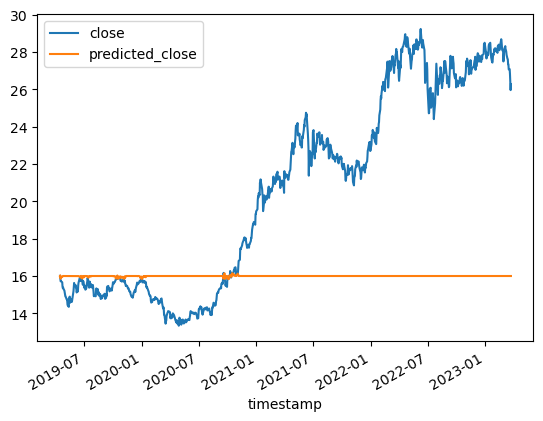

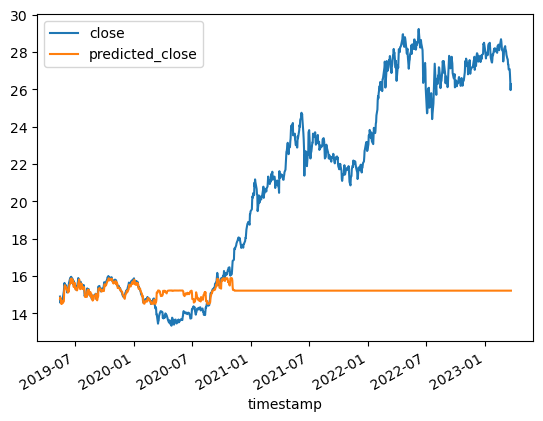

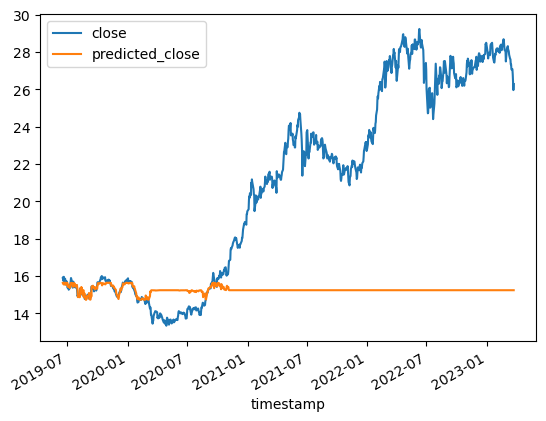

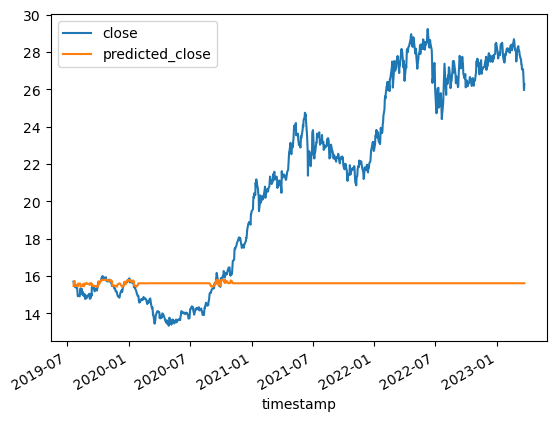

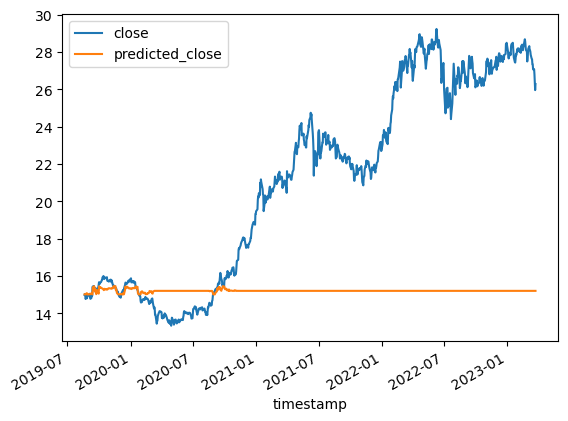

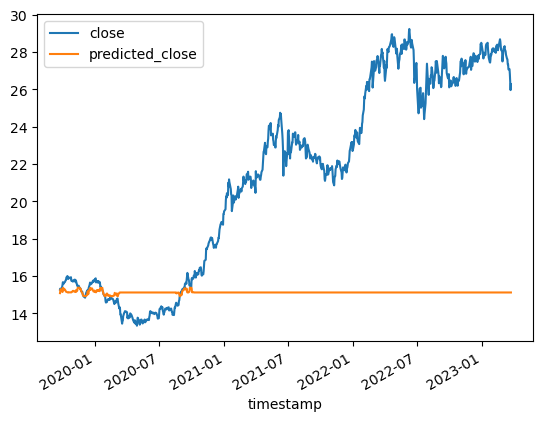

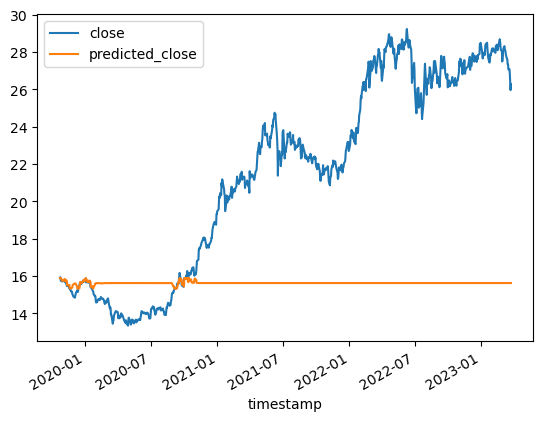

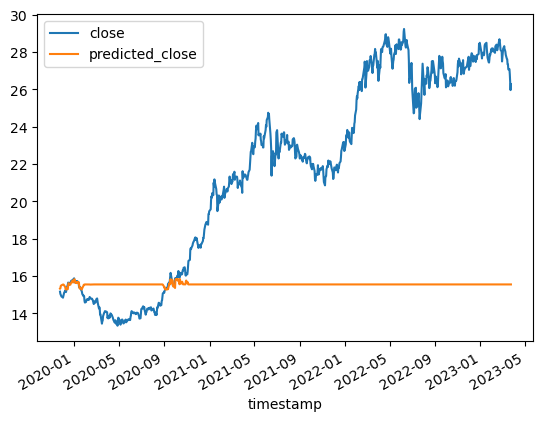

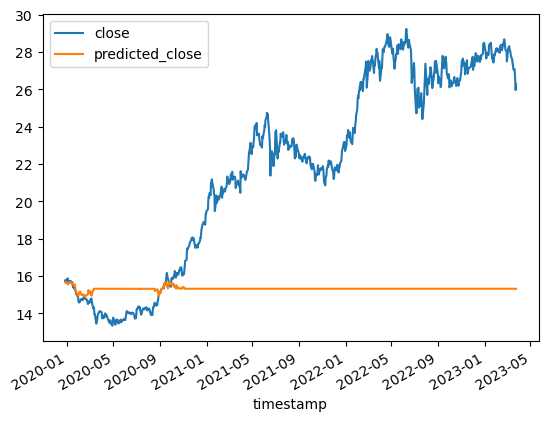

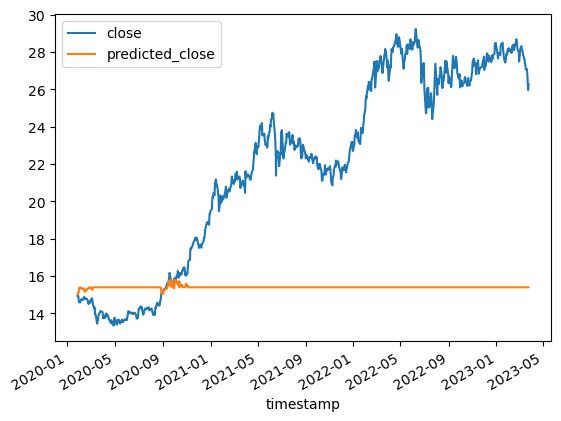

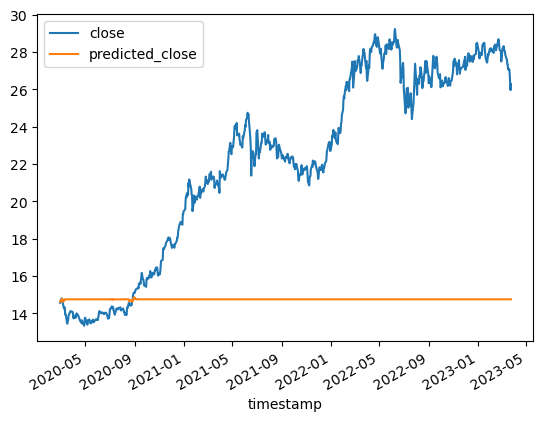

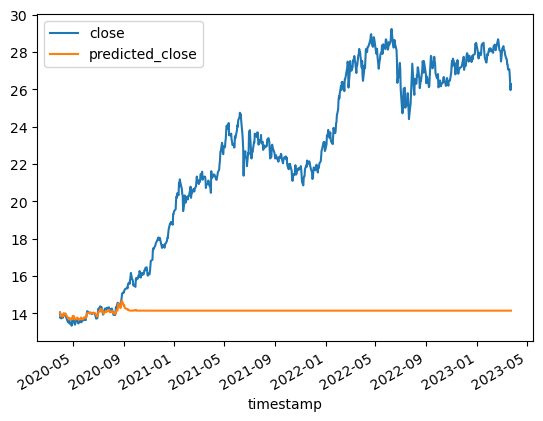

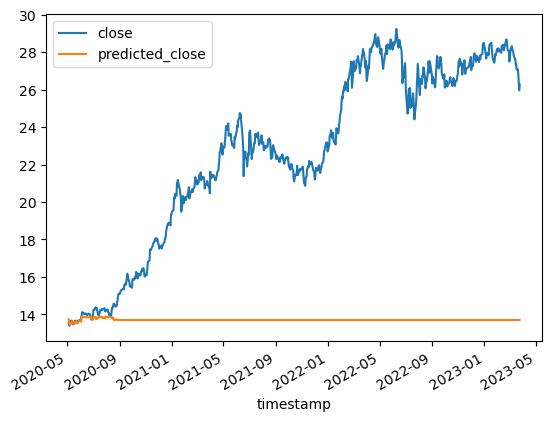

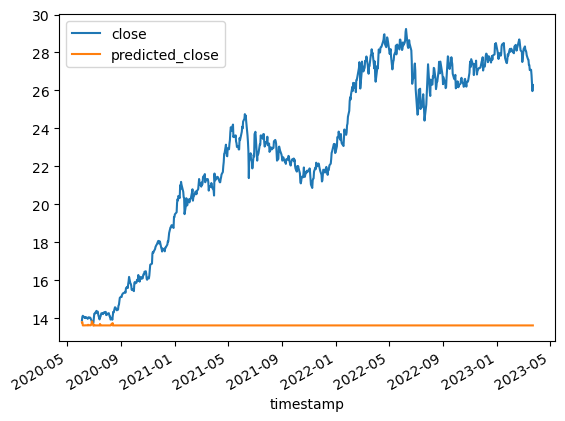

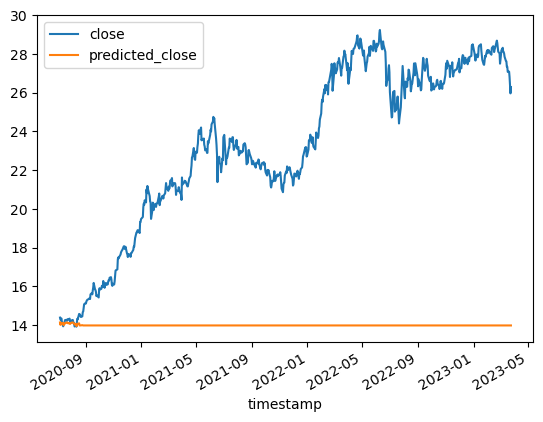

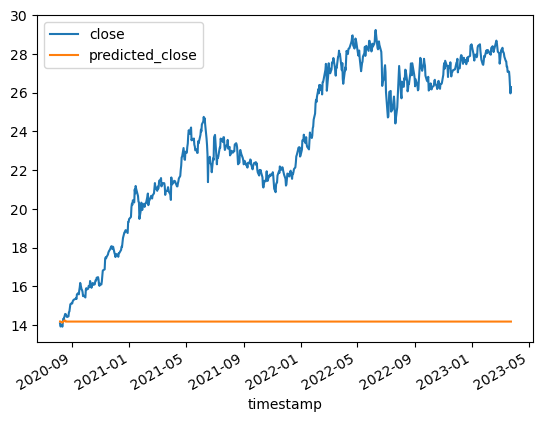

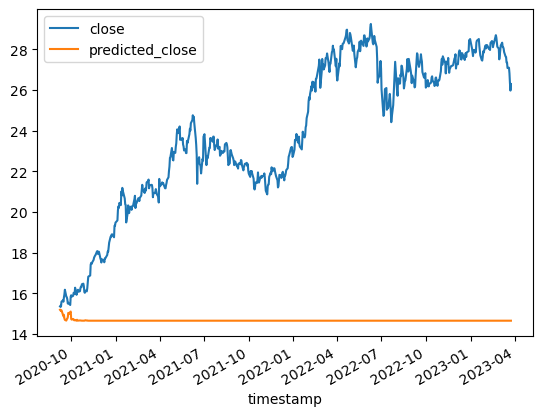

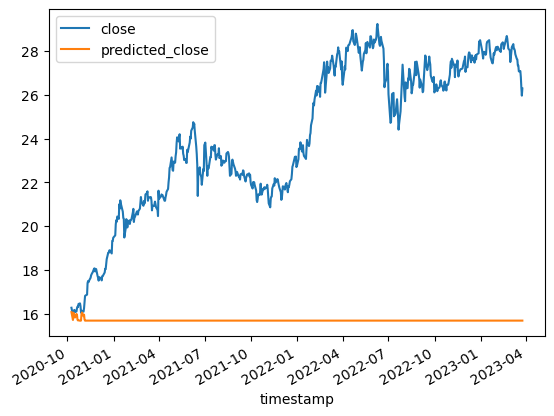

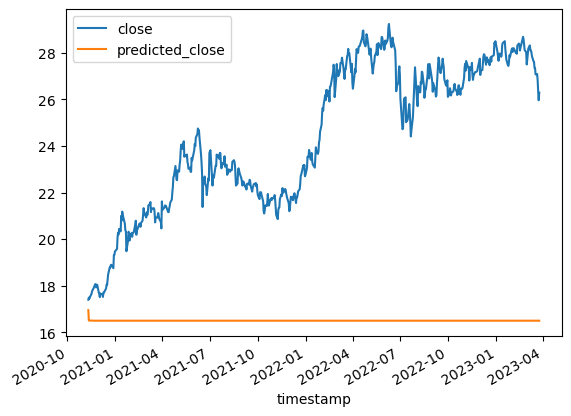

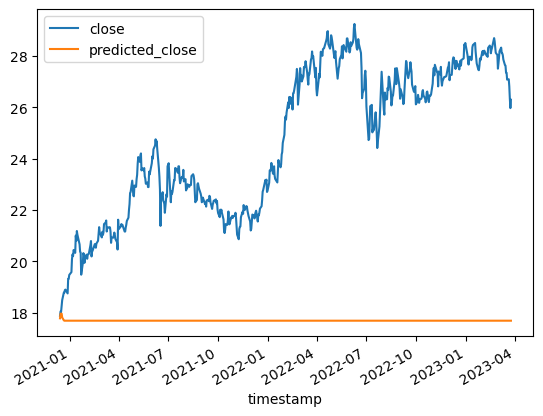

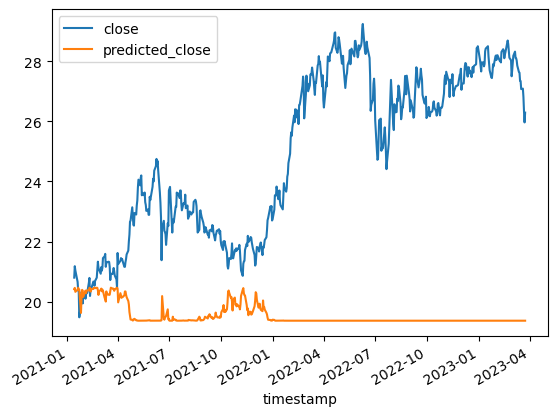

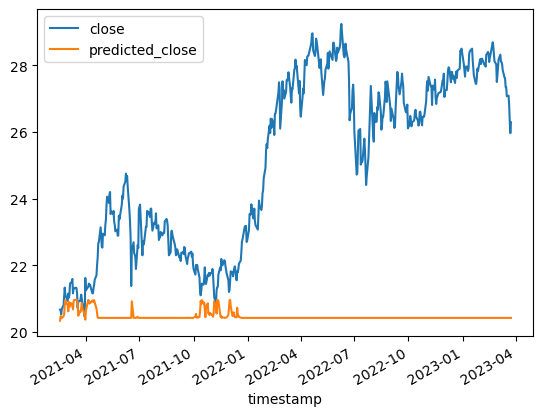

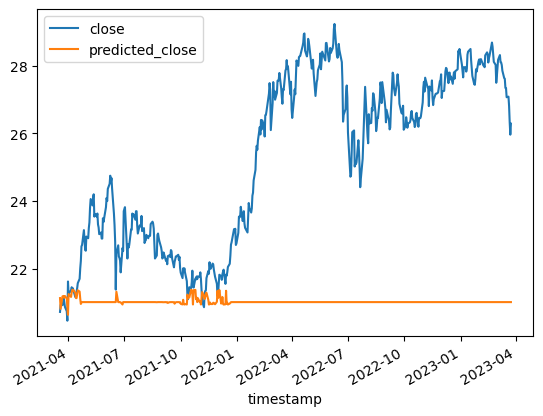

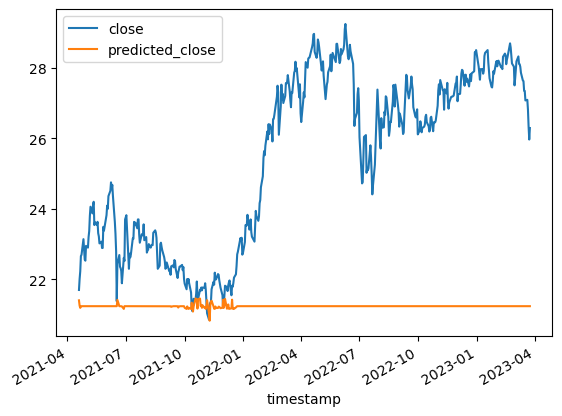

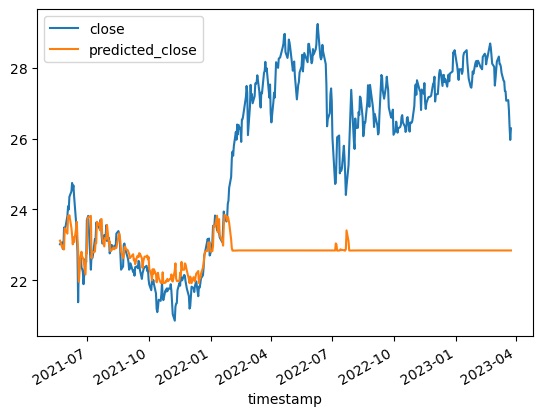

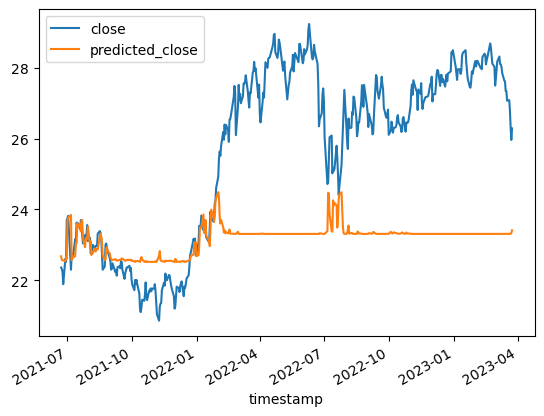

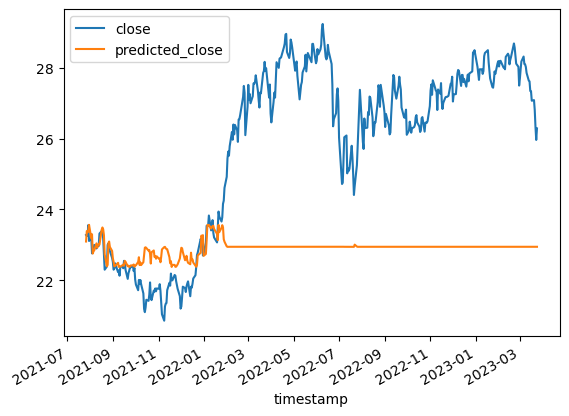

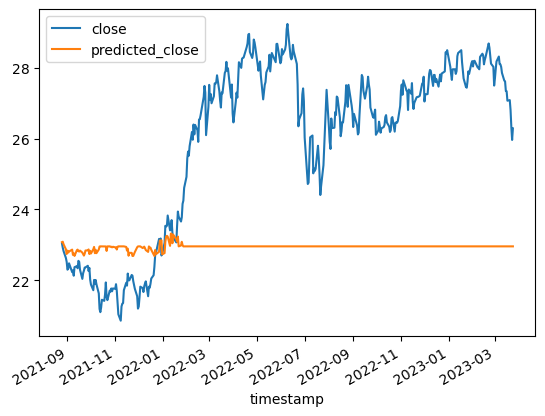

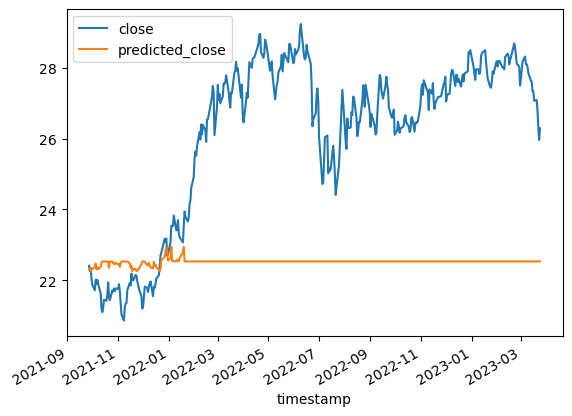

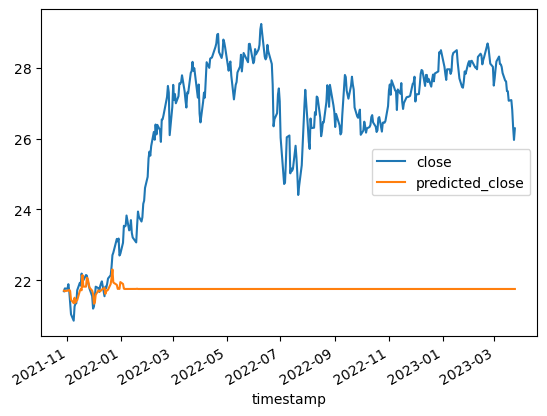

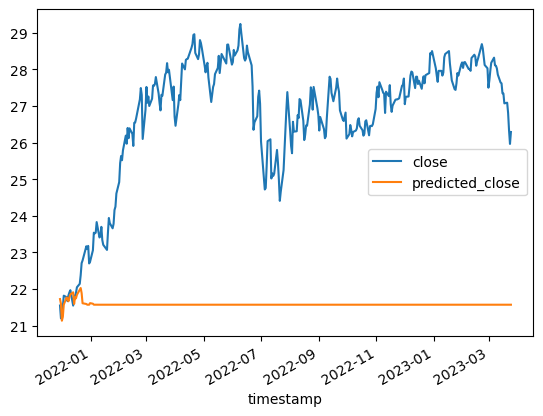

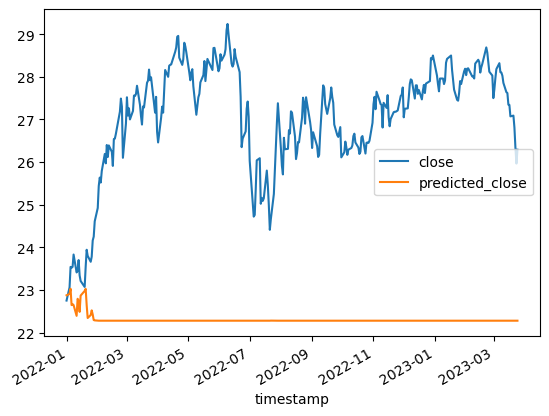

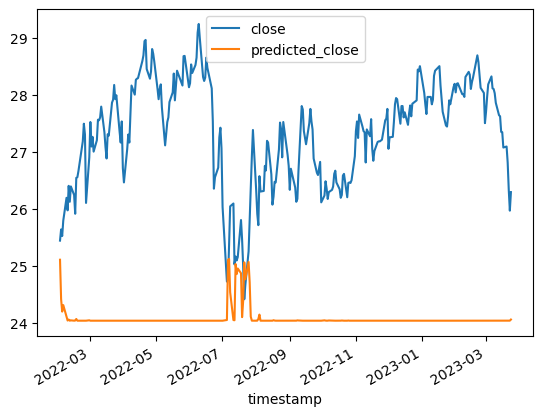

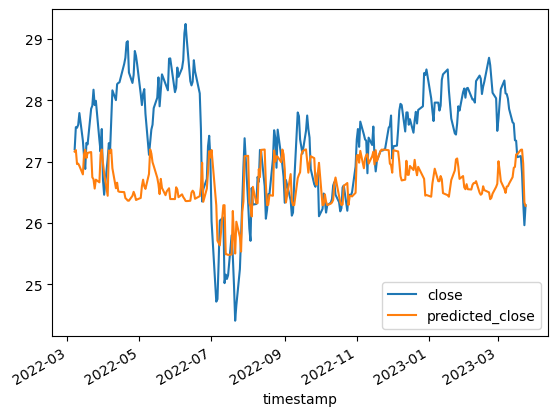

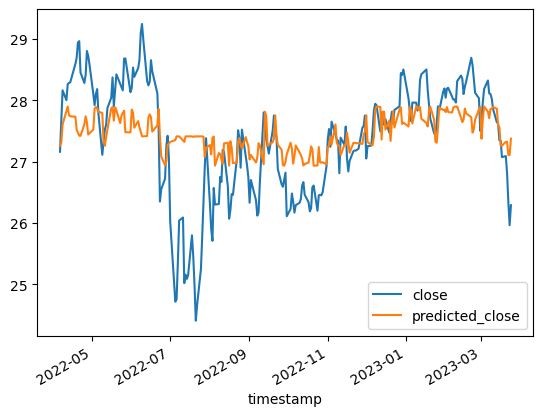

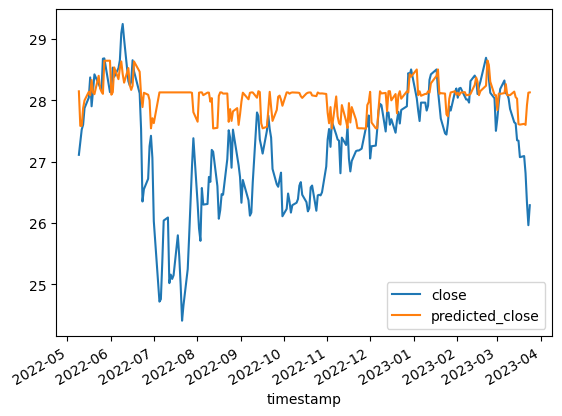

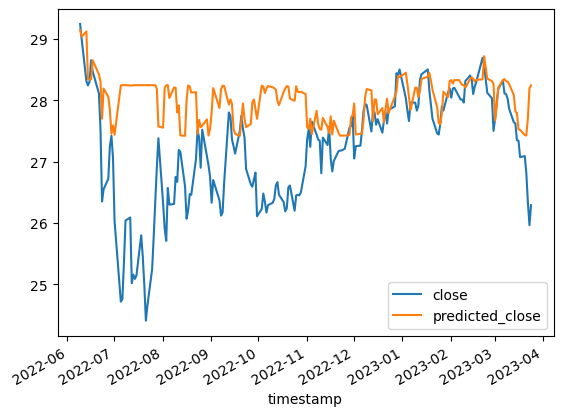

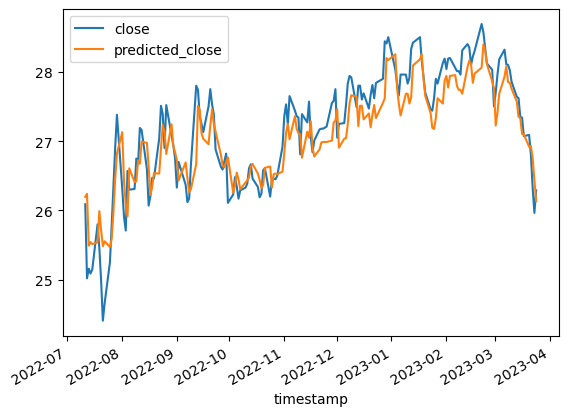

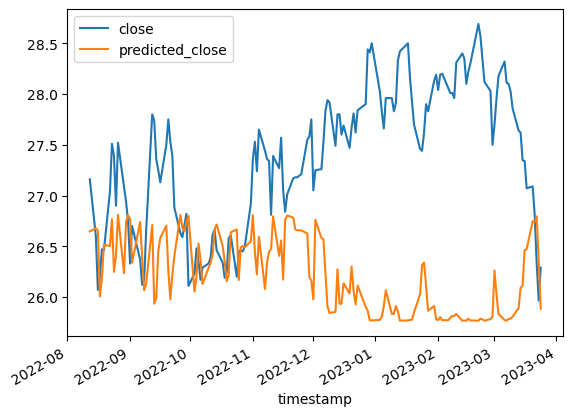

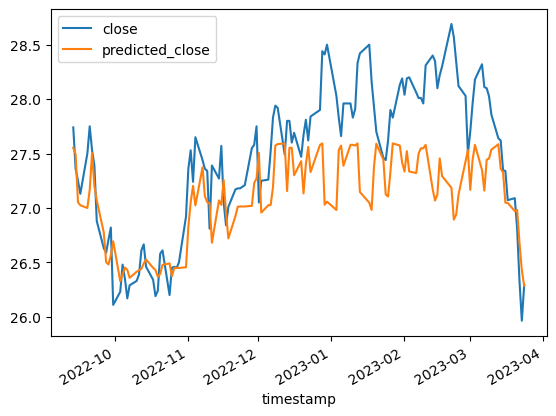

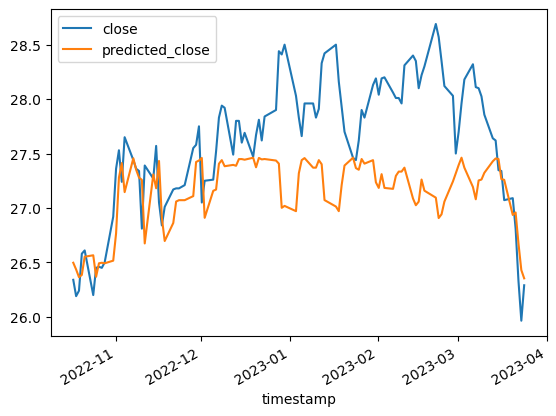

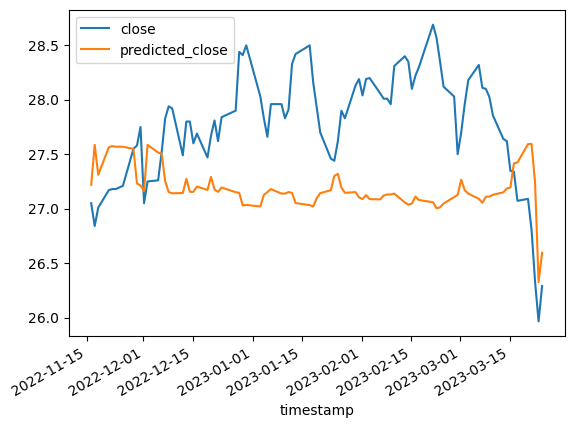

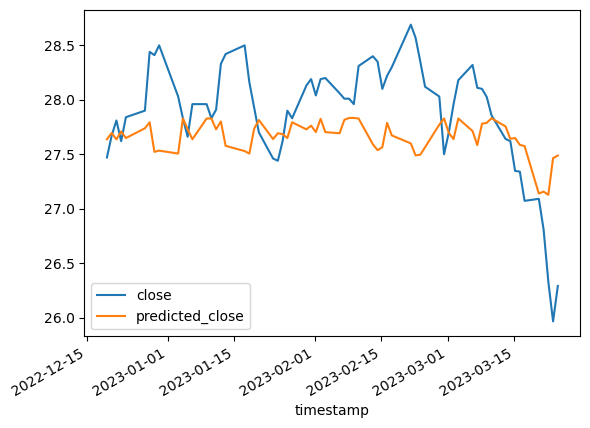

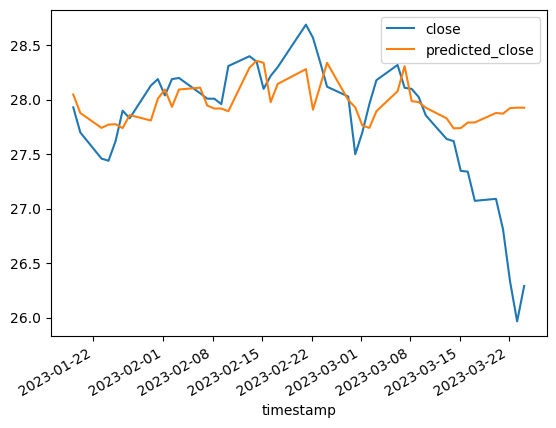

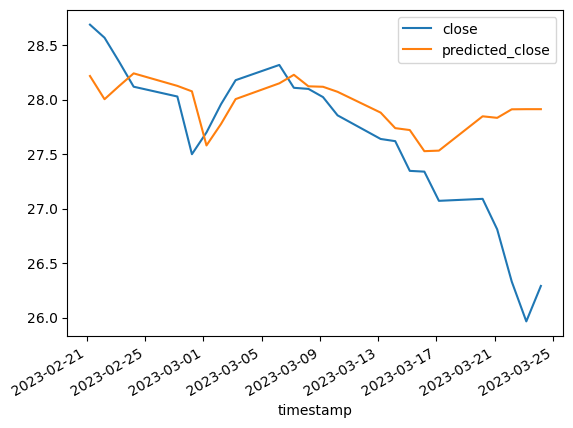

In [24]:
for i in range(len(predicted_df_list)-1):
    predicted_df_list[i].plot()